breas-cancer.csv load

histogram of diagnosis

histogram of area mean, color diagnosis
histogram of radius mean, color diagnosis
histogram of perimeter mean, color diagnosis
histogram of perimeter smoothness, color diagnosis

scatter plot of symmetry worst, color diagnosis



drop id column

set diagnosis as 0/1

show correlation

if correlation is greater than 0.2 then collect the feature, remove diagnosis

X = correlatins >0.2
Y = diagnosis


trains test split,0.2, (random state 42)

fit

Evaulation.

1. Accuracy
2. Precision
3. Recall
4. F1



Tip: search extra example data online, do one more

In [1]:
print("hello")

hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib as pl
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pprint


In [3]:
df = pd.read_csv('../breast-cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.hist

<bound method hist_frame of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
px.histogram(data_frame=df, x='diagnosis')

In [8]:
px.histogram(data_frame=df, x='area_mean', color='diagnosis')

scatter plot of symmetry worst, color diagnosis


In [9]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])



drop id column

set diagnosis as 0/1

show correlation

if correlation is greater than 0.2 then collect the feature, remove diagnosis

X = correlatins >0.2
Y = diagnosis

In [10]:
df.drop(columns=['id'],inplace=True)

In [11]:
df['diagnosis'] = (df.diagnosis == 'M').astype(int)

In [12]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [13]:
corr = df.corr()

<Axes: >

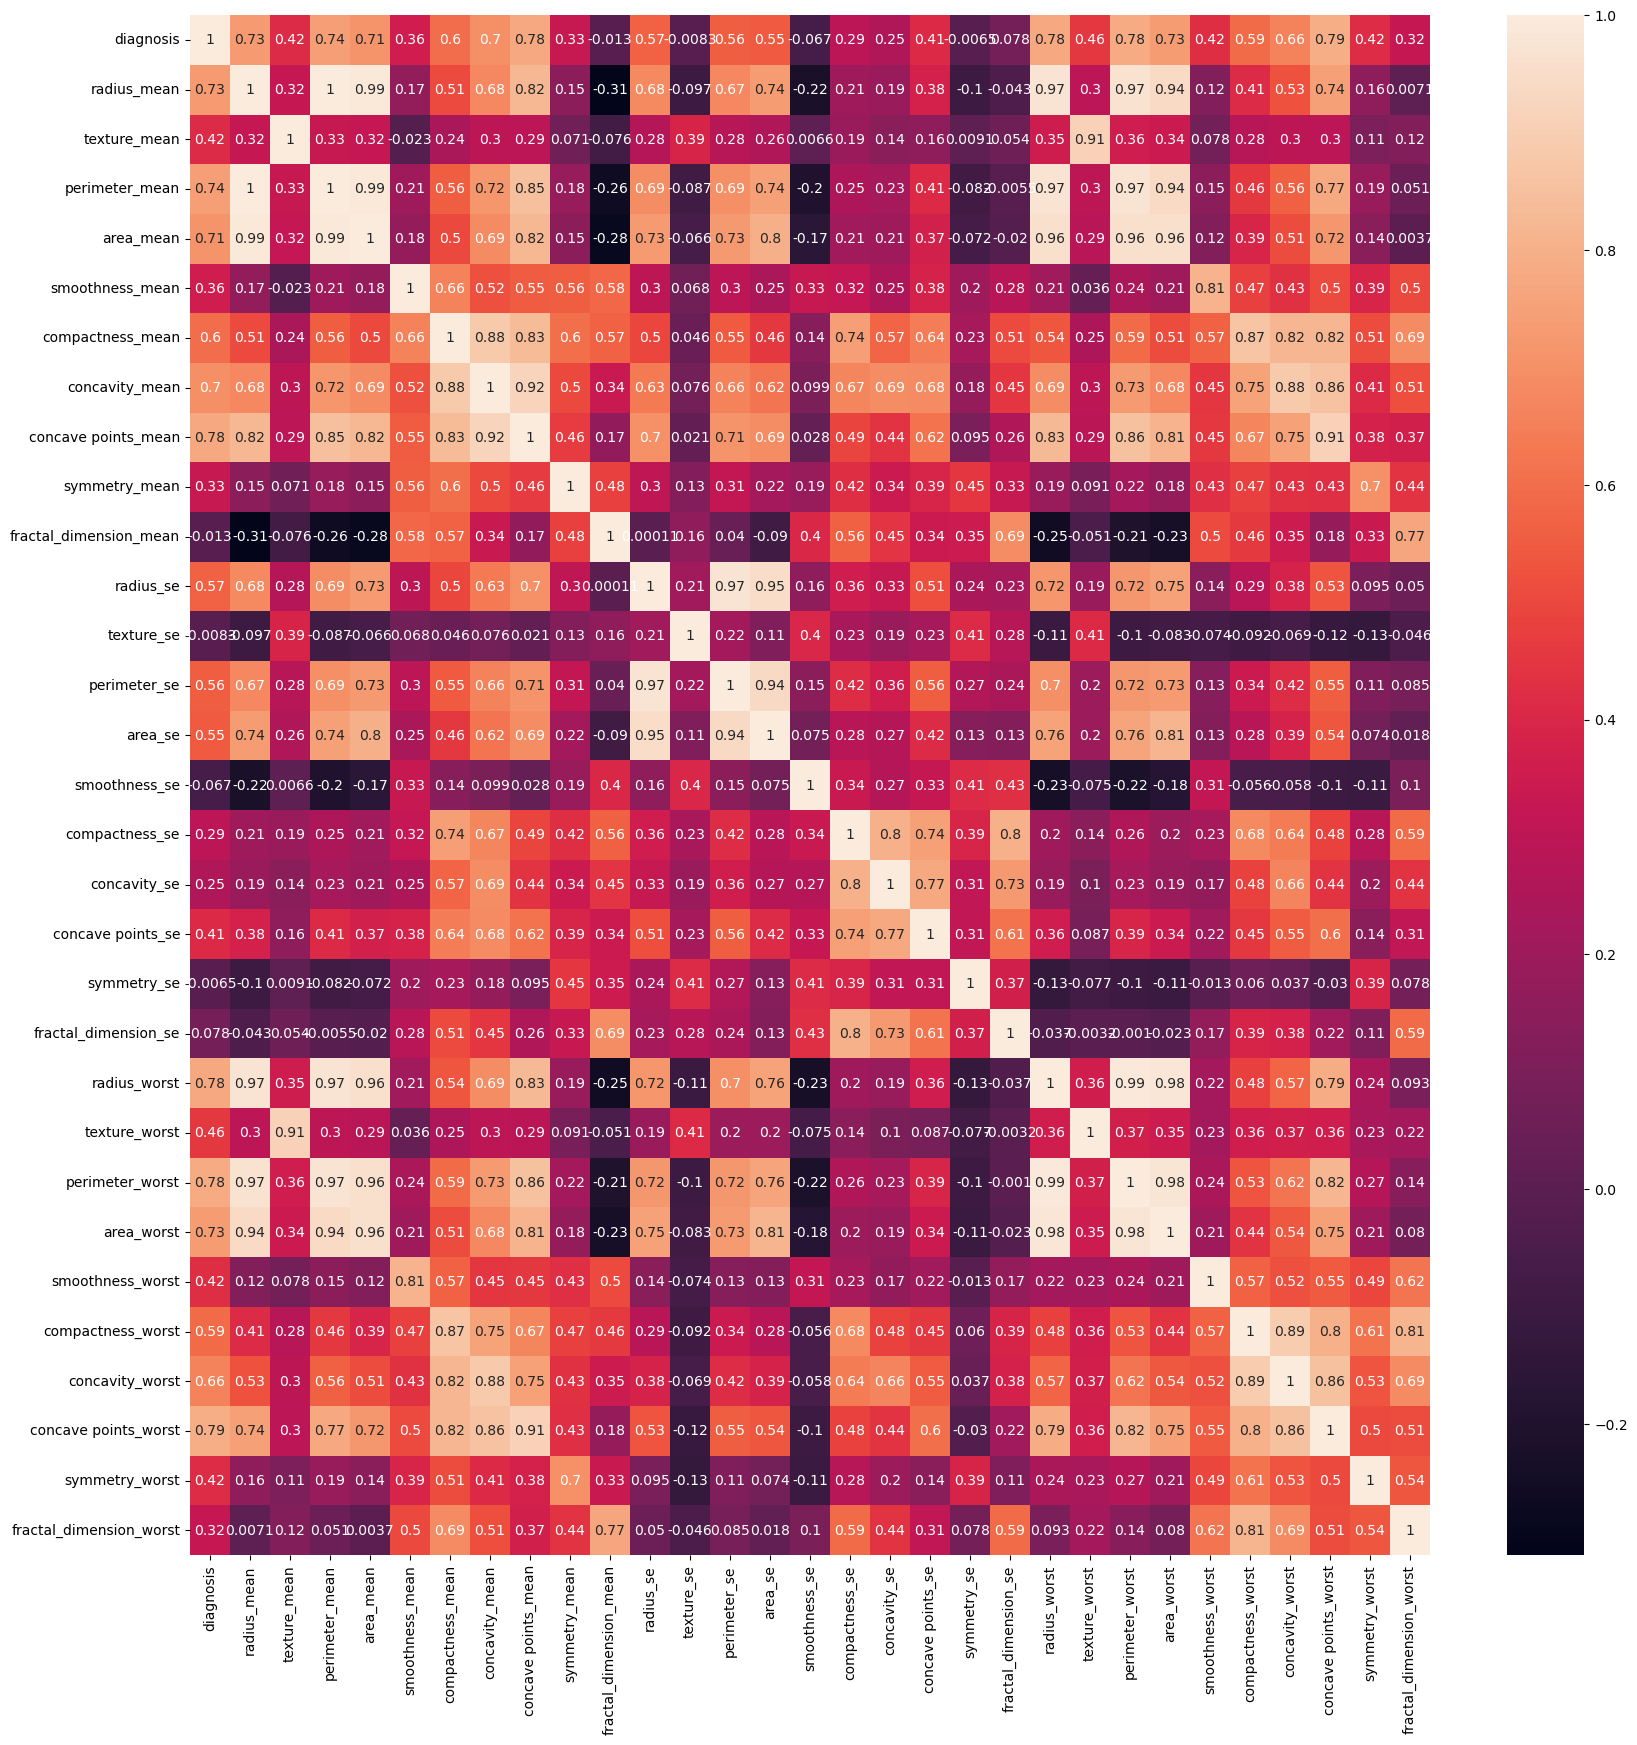

In [14]:
plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True)

In [15]:
corr = df.corr()
cor_diagnosis = corr['diagnosis']
relevant_features = cor_diagnosis[cor_diagnosis>0.2]

names = [index for index, value in relevant_features.items()]

names.remove('diagnosis')

pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


trains test split,0.2, (random state 42)

fit

Evaulation.

1. Accuracy
2. Precision
3. Recall
4. F1


In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [18]:
X = df[names].values
y = df['diagnosis'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

In [54]:
lr = LogisticRegression()

f = lr.fit(X_train, y_train)

In [55]:
lr.intercept_

array([-0.32475851])

In [56]:
lr.coef_

array([[ 0.48725817,  0.4231422 ,  0.44328742,  0.51223543,  0.05285768,
        -0.7150672 ,  0.68923942,  1.04733392, -0.36562168,  1.2054405 ,
         0.5852316 ,  0.89344836, -0.9523697 , -0.31507136,  0.34095045,
         0.95126774,  1.22837157,  0.68716261,  0.89310794,  0.8206111 ,
         0.05785104,  1.06744713,  0.87808415,  0.98283328, -0.02621569]])

In [57]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [58]:
y_pred = lr.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 97.37%
Precision: 97.62%
Recall: 95.35%
F1-Score: 96.47%


In [61]:
y_pred = lr.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 97.37%
Precision: 97.62%
Recall: 95.35%
F1-Score: 96.47%
